<a href="https://www.kaggle.com/code/bharathraam1691/graduate-admission?scriptVersionId=94067176" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
data1=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict.csv")
data2=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data2.duplicated().sum()

0

In [5]:
data2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
for col in data2.columns:
    if len(data2[col].unique())<5:
        print(col,data2[col].unique())
    

Research [1 0]


In [7]:
data2.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace=True)

In [8]:
data2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data2.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [11]:
data2.rename(columns={'LOR ':'LOR'}, inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


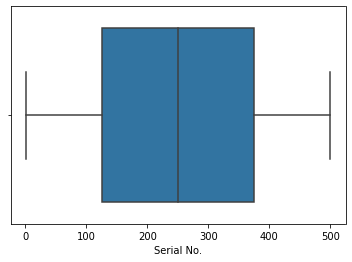

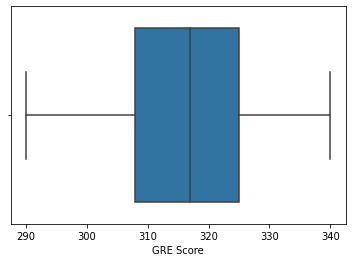

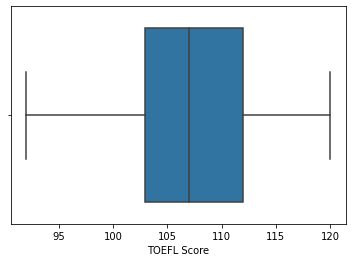

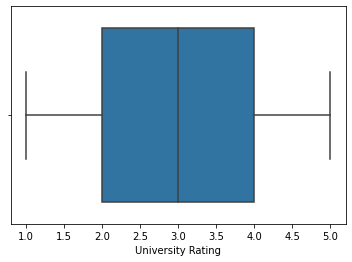

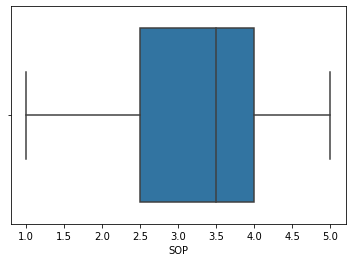

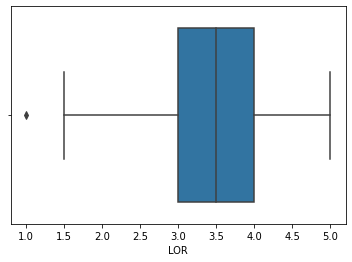

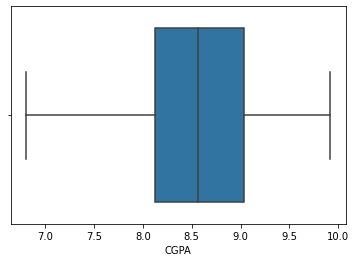

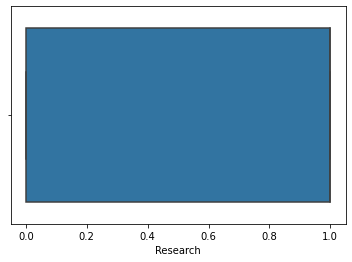

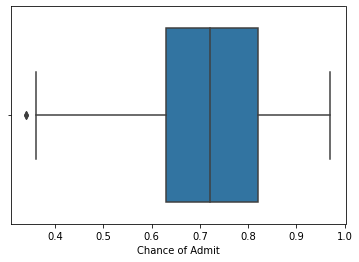

In [12]:
for i in data2.columns:
    plt.figure(i)
    print(sns.boxplot(i,data=data2))

In [13]:
data3=data2.copy()

In [14]:
data3=data3.drop(data3[data3['Chance of Admit']<0.6].index)

In [15]:
data3=data3.drop(data3[data3['LOR']<2.5].index)

In [16]:
data3=data3.drop(data3[data3['University Rating']<2.5].index)

In [17]:
data3=data3.drop(data3[data3['CGPA']<7.5].index)

In [18]:
cols=[]
for i in data3.columns:
    cols.append(i)

In [19]:
cols

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance of Admit']

In [20]:
data3.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
5,6,330,115,5,4.5,3.0,9.34,1,0.90


In [21]:
data4=data3.copy()

<AxesSubplot:>

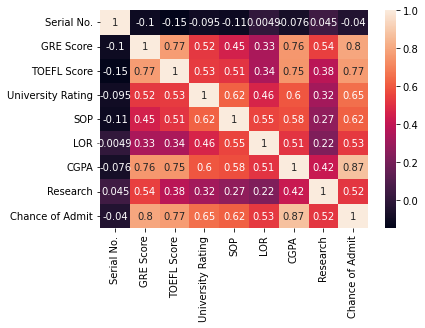

In [22]:
sns.heatmap(data4.corr(), annot=True)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

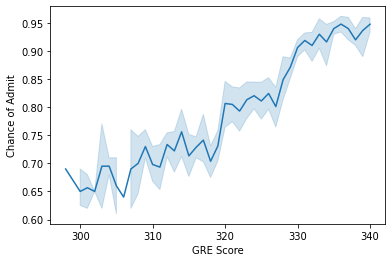

In [23]:
sns.lineplot(x='GRE Score',y='Chance of Admit',data=data4)

In [24]:
data4.drop('Serial No.',axis=1,inplace=True)

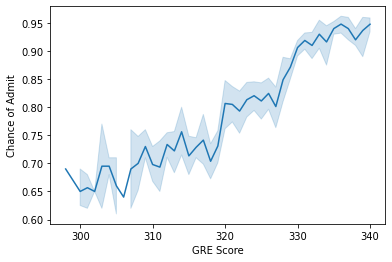

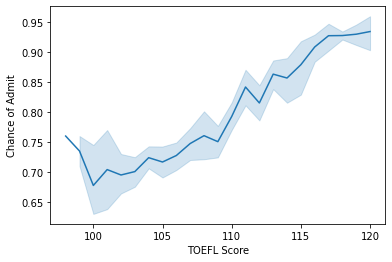

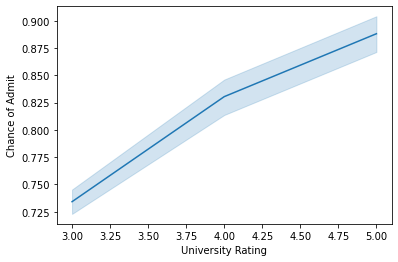

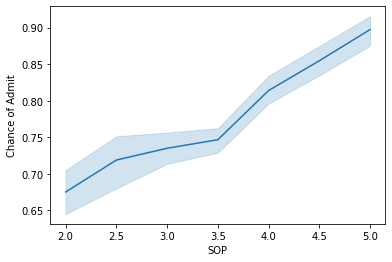

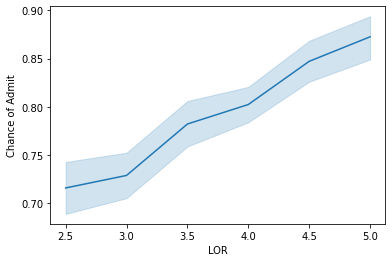

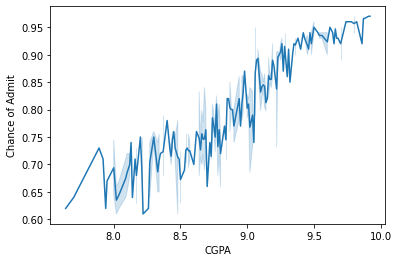

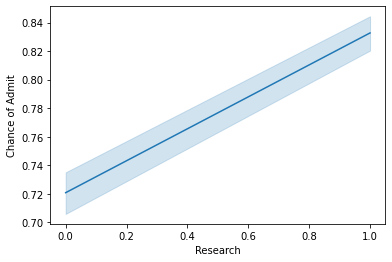

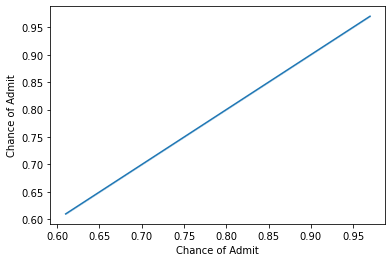

In [25]:
for i in data4.columns:
    plt.figure(i)
    sns.lineplot(x=i,y=data4['Chance of Admit'],data=data4)

In [26]:
X=data4.drop("Chance of Admit",axis=1)
y=data3['Chance of Admit']

In [27]:
data4.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90


In [28]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_New=pd.DataFrame(mm.fit_transform(X))

In [29]:
X_New.head()

,0,1,2,3,4,5,6
0,0.928571,0.909091,0.5,0.833333,0.8,0.881579,1.0
1,0.619048,0.409091,0.5,0.666667,0.8,0.539474,1.0
2,0.428571,0.272727,0.0,0.333333,0.4,0.157895,1.0
3,0.571429,0.545455,0.0,0.500000,0.0,0.451754,1.0
4,0.761905,0.772727,1.0,0.833333,0.2,0.745614,1.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X_New,y,train_size=0.7,random_state=42)

In [32]:
import catboost as cb
cat = cb.CatBoostRegressor()
cat.fit(X_train,y_train)
cat.score(X_test,y_test)

Learning rate set to 0.031971
0:	learn: 0.0955837	total: 53ms	remaining: 52.9s
1:	learn: 0.0937141	total: 53.8ms	remaining: 26.9s
2:	learn: 0.0918567	total: 54.3ms	remaining: 18.1s
3:	learn: 0.0900927	total: 54.8ms	remaining: 13.6s
4:	learn: 0.0882399	total: 55.2ms	remaining: 11s
5:	learn: 0.0865456	total: 55.6ms	remaining: 9.21s
6:	learn: 0.0848989	total: 56.2ms	remaining: 7.97s
7:	learn: 0.0831972	total: 56.9ms	remaining: 7.06s
8:	learn: 0.0815610	total: 57.5ms	remaining: 6.33s
9:	learn: 0.0799336	total: 58.1ms	remaining: 5.75s
10:	learn: 0.0783745	total: 58.9ms	remaining: 5.3s
11:	learn: 0.0769748	total: 59.3ms	remaining: 4.89s
12:	learn: 0.0756532	total: 59.9ms	remaining: 4.55s
13:	learn: 0.0742856	total: 60.5ms	remaining: 4.26s
14:	learn: 0.0728748	total: 61.4ms	remaining: 4.03s
15:	learn: 0.0716043	total: 61.9ms	remaining: 3.81s
16:	learn: 0.0703749	total: 62.3ms	remaining: 3.6s
17:	learn: 0.0691850	total: 62.9ms	remaining: 3.43s
18:	learn: 0.0681187	total: 63.5ms	remaining: 3.28

0.8438514338142185

In [33]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

0.7037715303900219

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8551625210675927

In [35]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
rr.score(X_test,y_test)

0.8494657988517126

In [36]:
from sklearn.neural_network import MLPRegressor
mlr=MLPRegressor(hidden_layer_sizes=(32,32),activation="identity",solver="lbfgs")
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)

In [37]:
mlr.score(X_test,y_test)

0.8554113813894535